# I-HANK model

Variables\
A_hh: Houshold assets deflated with PNT \
A: Houshold assets nominal\
E_hh: Houshold expenditure deflated with PNT \
E: Nominal Houshold expenditure

Parameters follow notation from I-HANK docunemtation.\
New parameters are followed by _



In [82]:
%load_ext autoreload
%autoreload 2

import numpy as npc

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import func 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
model = IHANKModelClass(name='baseline')
model.find_ss(do_print=True)
func.plot_policy(model, ['a', 'e', 'ct', 'cnt', 'cth', 'ctf'])

[0.40956115 0.49879228]
steady state found in 10.1 secs
ss.inc_TH = 0.349
ss.inc_NT = 0.351
par.nu_ = 0.410
par.alphaF = 0.333
par.varphiTH = 0.772
par.varphiNT = 0.772
ss.M_s = 0.296
ss.clearing_YTH =   0.00000000
ss.clearing_YNT =   0.00000000
ss.G = 0.298
ss.NFA = 0.000


Text(0.5, 1.0, 'Non-homothetic expenditure shares')

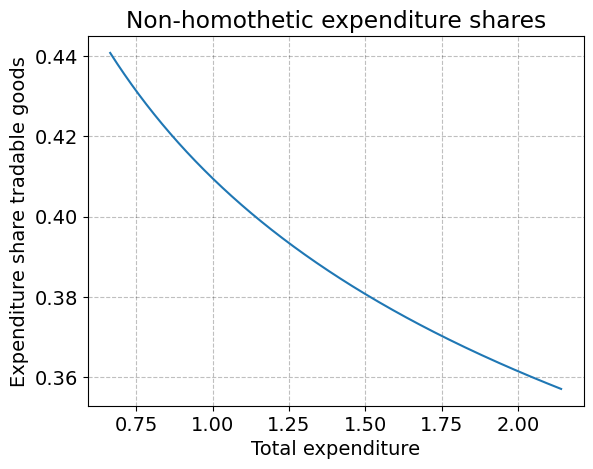

In [87]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
a_ = model.ss.a[0,3,:]*model.ss.PNT
e_ = model.ss.e[0,3,:]*model.ss.PNT
ect_ = model.ss.ct[0,3,:]*model.ss.PT
ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
share_ = ect_/(ecnt_+ect_)

plt.figure()
plt.plot(e_,share_)
plt.xlabel('Total expenditure')
plt.ylabel('Expenditure share tradable goods')
plt.title('Non-homothetic expenditure shares')

note: inputs = steady state value -> expected: constant value (straigt line) in roughly -10^-5 to 10^5

household problem solved along transition path in 0.8 secs
household problem simulated along transition in 1.3 secs



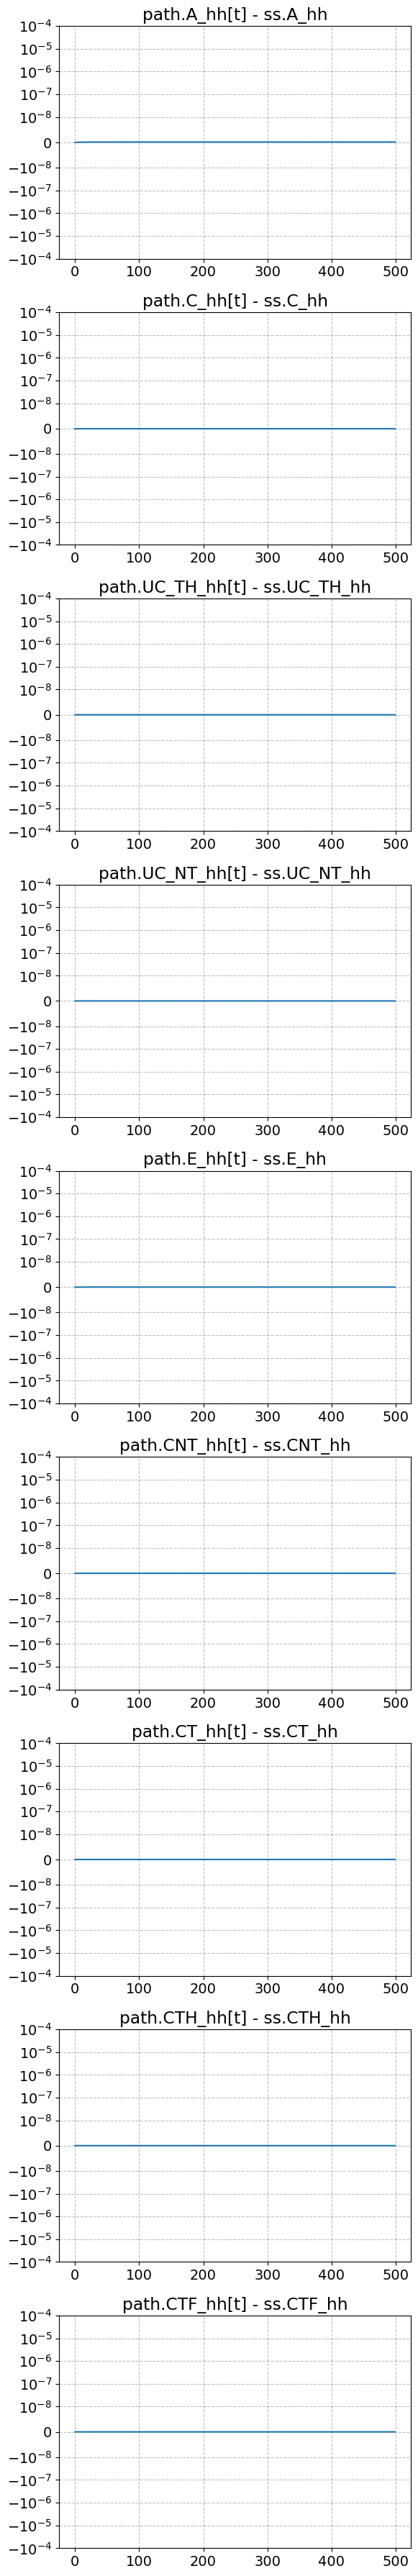

In [88]:
model.test_hh_path()

In [90]:
model.test_path()

shocks: ZTH ZNT M_s rF PF_s beta G i_shock 
unknowns: CB NNT NTH piWTH piWNT 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.mon_pol
  E                0.0e+00
 blocks.production
  YTH              0.0e+00
  YNT              0.0e+00
  WTH              0.0e+00
  WNT              0.0e+00
  PTH              0.0e+00
  PNT              0.0e+00
 blocks.prices
  PF               3.0e-01
  PTH_s            4.3e-01
  PT               1.2e-01
  P                5.5e-02
  pi_F_s           0.0e+00
  pi_F             3.0e-01
  pi_NT            0.0e+00
  pi_TH            0.0e+00
  pi_T             1.2e-01
  pi               5.5e-02
  pi_TH_s          4.3e-01
 blocks.central_bank
  i                1.1e-16
 blocks.government
  B                1.7e-16
  tau              0.0e+00
 blocks.HH_pre
  inc_TH           3.5e-01
  inc_NT           3.5e-01
  ra               1.1e-16
  p                1.4e-01
 hh
  A_hh             7.2e+00
  C_hh             0.0e+00
  UC_TH_hh         5.8e-01
  UC_NT_h